In [7]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("C:Downloads/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [10]:
# 1 Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [13]:
df.shape

(429435, 67)

In [15]:
list (df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [17]:
# 2 Si chiede di trovare, per ogni continente: 
# a. il numero di casi fin dall'inizio della pandemia
# b. la percentuale rispetto al totale mondiale del numero di casi

In [19]:
casi_x_continente = df.groupby("continent")["total_cases"].max()         # PUNTO (a)


In [21]:
casi_x_continente 

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64

In [23]:
tot_mondiale = casi_x_continente.sum()

In [25]:
percentuale_mondiale = (casi_x_continente / tot_mondiale) * 100           # PUNTO (b)

In [27]:
percentuale_mondiale

continent
Africa            1.379413
Asia             33.656928
Europe           13.208143
North America    35.033241
Oceania           4.017282
South America    12.704993
Name: total_cases, dtype: float64

In [29]:
# 3 Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 

In [167]:
type (df["date"])   

pandas.core.series.Series

In [34]:
df["date"] = pd.to_datetime(df["date"])
filter_italy_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]
filter_italy_2022

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [ ]:
# (a) mostrare l'evoluzione del casi totali dall'inizio alla fine dell'anno

<Axes: xlabel='date'>

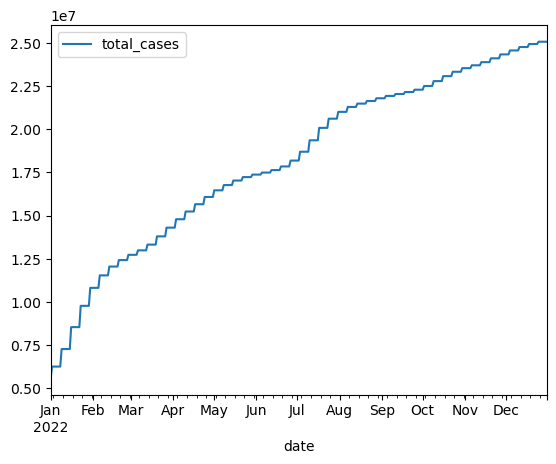

In [38]:
filter_italy_2022.plot(x="date", y="total_cases")

In [ ]:
# (b) mostro il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [42]:
italy_weekly_cases = filter_italy_2022.dropna(subset=["new_cases"])  #elimino i dati nulli

<Axes: xlabel='date'>

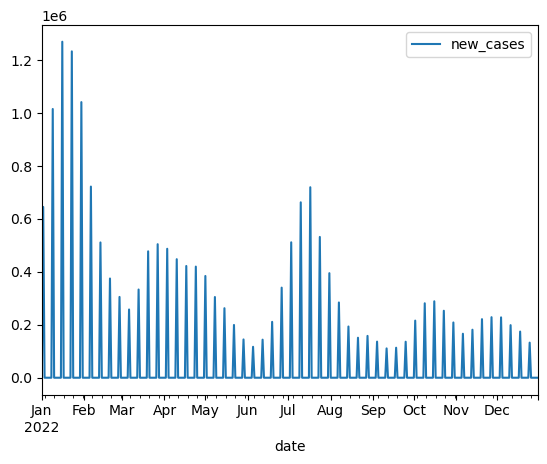

In [44]:
italy_weekly_cases.plot(x="date", y="new_cases")

In [ ]:
# (4)Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

In [82]:
df_countries = df[(df["location"].isin(["Italy", "Germany", "France"])) &
(df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30")]
df_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,89536.72,6.19,6.24,1385.4463
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [95]:
df_pulizia_countries=df_countries.dropna(subset="icu_patients")  #elimino i dati nulli

In [97]:
df_pulizia_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,89536.72,6.19,6.24,1385.4463
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [88]:
import seaborn as sns

<Axes: xlabel='location', ylabel='icu_patients'>

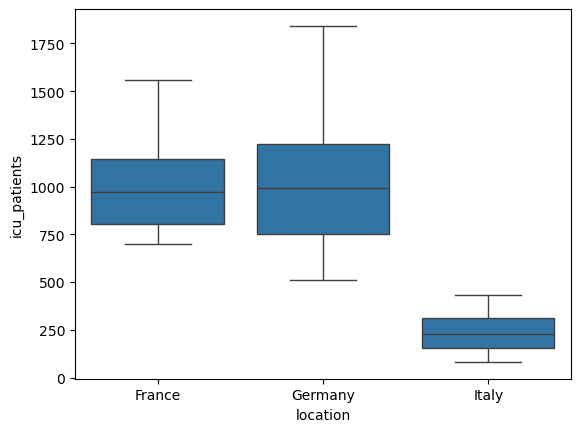

In [99]:
sns.boxplot(x="location", y="icu_patients", data=df_pulizia_countries)

# (a) scrivere un breve commento a riguardo:
# Dal grafico possiamo vedere che Francia e la Germania hanno una situazione di ospedalizzazione più o meno simile
# Possiamo vedere anche che le loro media per quanto riguardo le ospedalizzazioni sono uguali
# Mentre la situazuone dell' Italia possiamo dire che è nettamente migliore per quanto riguarda le ospedalizzazioni, sono nettamente inferiori delle precedenti 
# L' analisi fa riferimento ai dati che vanno dal 01/05/22 al 30/04/23.


In [105]:
# (5)Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:

In [155]:
df_countries_2023 = df[(df["location"].isin(["Italy", "Germany", "France","Spain"])) &
(df["date"] .dt.year == 2023)]

In [157]:
df_countries_2023

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131459,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,122241.83,6.64,25.91,1887.7128
131460,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131461,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131462,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131463,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364038,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364039,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364040,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364041,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN


In [ ]:
# mostrare la somma dei pazienti ospitalizzati per ognuna (nazione)

In [171]:
somma_ospedalizzati = df_countries_2023.groupby("location")["hosp_patients"].sum()

In [173]:
somma_ospedalizzati

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64